#Install and Import Libraries

In [8]:
# 1 — install packages and spaCy models
!pip install -q spacy pandas matplotlib

In [9]:
import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
# Download english spacy models
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md


import spacy
from spacy import displacy
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 97.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 69.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#Load Dataset

In [11]:
#load Dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
data_path="/content/drive/MyDrive/CoNLL003dataset"

#read files train/valid/test
train_file = data_path + "/train.txt"
val_file = data_path + "/valid.txt"
test_file = data_path + "/test.txt"

In [13]:
def read_conll_format(file_path):
  sentences=[]
  words = []
  with open(file_path, "r" , encoding="utf-8") as f:
       for line in f:
           line = line.strip()
           if not line:
              if words:
                  sentences.append(" ".join(words))
                  words = []
              continue
           parts = line.split()
           if len(parts) >= 2:
              words.append(parts[0])
  return sentences

train_sentences = read_conll_format(train_file)
val_sentences = read_conll_format(val_file)
test_sentences = read_conll_format(test_file)

print("train samples", len(train_sentences))
print("val samples", len(val_sentences))
print("test samples", len(test_sentences))

print("Example for train:" , train_sentences[0])


train samples 14987
val samples 3466
test samples 3684
Example for train: -DOCSTART-


#Load apaCy Models

In [14]:
# models spaCy
!python -m spacy download en_core_web_sm
!python -m spacy download en_core_web_md

nlp_sm = spacy.load("en_core_web_sm")
nlp_md = spacy.load("en_core_web_md")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 144.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_md-3.8.0/en_core_web_md-3.8.0-py3-none-any.whl (33.5 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


#Rule-Based NER

In [15]:
import re

def rule_based_ner(text):
  people = re.findall(r'\b[A-Z][a-z]+\s[A-Z][a-z]+\b', text)
  locations = re.findall(r'\b(?:Paris|London|New York|Berlin|Tokyo)\b', text)
  orgs = re.findall(r'\b(?:Microsoft|Google|Apple|Amazon|UN)\b' , text)
  return {"People": people, "Locations": locations, "Organizations": orgs}

example_text= train_sentences[2]
rule_entities = rule_based_ner(example_text)

#print(rule_entities)  #.
print("Rule-base Entities:")
for k,v in rule_entities.items():
  print(k, ":", v)


Rule-base Entities:
People : ['Peter Blackburn']
Locations : []
Organizations : []


#Model-Based NER

In [16]:
def spacy_ner(text, model):
  doc = model(text)
  entities = [(ent.text, ent.label_) for ent in doc.ents]
  return entities

text_example = train_sentences[1]

print ("Entities (Small model):")
print(spacy_ner(text_example, nlp_sm))

print("\nEntities (Medium model):")
print(spacy_ner(text_example, nlp_md))


Entities (Small model):
[('EU', 'ORG'), ('German', 'NORP'), ('British', 'NORP')]

Entities (Medium model):
[('EU', 'ORG'), ('German', 'NORP'), ('British', 'NORP')]


#Visualize Entities with display

In [17]:
from spacy import displacy

doc = nlp_md(text_example)
displacy.render(doc, style="ent", jupyter=True)


In [21]:
#  Show Extracted Entities Clearly

sample_texts = test_sentences[:5]

for i, text in enumerate(sample_texts, 1):
    doc = nlp_md(text)
    print(f"\n Sentence {i}: {text}")
    print(" Extracted Entities:")
    for ent in doc.ents:
        print(f"  - {ent.text:<25} --> {ent.label_}")



 Sentence 1: -DOCSTART-
 Extracted Entities:
  - -DOCSTART-                --> ORG

 Sentence 2: SOCCER - JAPAN GET LUCKY WIN , CHINA IN SURPRISE DEFEAT .
 Extracted Entities:
  - SOCCER - JAPAN            --> ORG
  - SURPRISE                  --> GPE

 Sentence 3: Nadim Ladki
 Extracted Entities:
  - Nadim Ladki               --> PERSON

 Sentence 4: AL-AIN , United Arab Emirates 1996-12-06
 Extracted Entities:
  - AL-AIN                    --> ORG
  - United Arab Emirates      --> GPE
  - 12-06                     --> CARDINAL

 Sentence 5: Japan began the defence of their Asian Cup title with a lucky 2-1 win against Syria in a Group C championship match on Friday .
 Extracted Entities:
  - Japan                     --> GPE
  - Asian Cup                 --> EVENT
  - 2                         --> CARDINAL
  - Syria                     --> GPE
  - Group C                   --> ORG
  - Friday                    --> DATE


#Compare Models

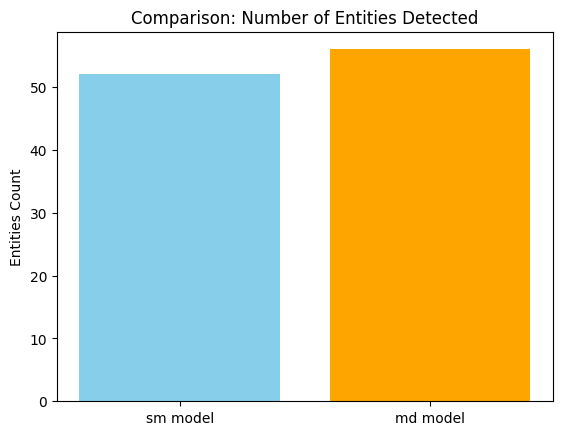

In [18]:
sample_texts = test_sentences[:20]

def count_entities(model, texts):
  total_ents = 0
  for t in texts:
      total_ents += len(model(t).ents)
  return total_ents

sm_count = count_entities(nlp_sm, sample_texts)
md_count = count_entities(nlp_md, sample_texts)

#print(f"Small Model Entities: {sm_count}")
#print(f"Medium Model Entities: {md_count}")

plt.bar(["sm model", "md model"], [sm_count, md_count], color=["skyblue","orange"])
plt.title("Comparison: Number of Entities Detected")
plt.ylabel("Entities Count")
plt.show()


#Summary

In [19]:
print(" Summary:")
print("Rule-based approach: Simple but limited accuracy.")
print("Model-based (spaCy sm): Lightweight, decent performance.")
print("Model-based (spaCy md): More accurate and detects more entities.")
print("\nConclusion: 'en_core_web_md' gives better and more detailed NER results.")


 Summary:
Rule-based approach: Simple but limited accuracy.
Model-based (spaCy sm): Lightweight, decent performance.
Model-based (spaCy md): More accurate and detects more entities.

Conclusion: 'en_core_web_md' gives better and more detailed NER results.



 Entity Type Frequency:


,Entity Type,Count
2,PERSON,54
1,GPE,36
3,CARDINAL,24
0,ORG,16
6,ORDINAL,16
5,DATE,13
7,NORP,9
4,EVENT,6
8,TIME,6
10,QUANTITY,3


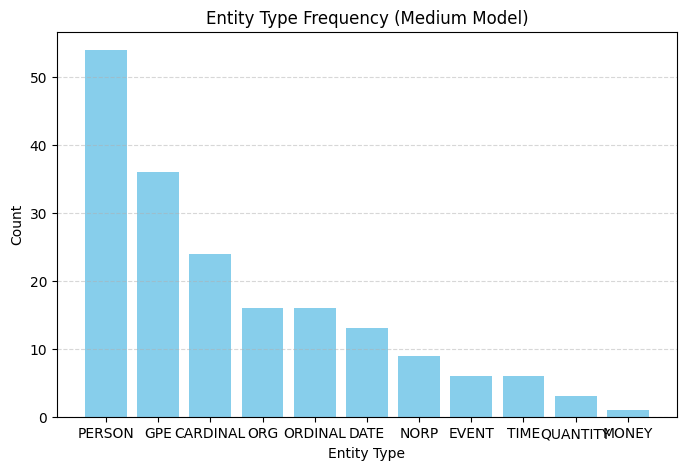

In [24]:
#  Count and Compare Entity Types


from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

#Entity Type Frequency (Medium Model)
labels_md = []
for text in test_sentences[:50]:
    doc = nlp_md(text)
    labels_md.extend([ent.label_ for ent in doc.ents])

#take several and chart
counts = Counter(labels_md)
df_counts = pd.DataFrame(counts.items(), columns=["Entity Type", "Count"])
df_counts = df_counts.sort_values(by="Count", ascending=False)

print("\n Entity Type Frequency:")
display(df_counts)

# graph
plt.figure(figsize=(8,5))
plt.bar(df_counts["Entity Type"], df_counts["Count"], color="skyblue")
plt.title("Entity Type Frequency (Medium Model)")
plt.ylabel("Count")
plt.xlabel("Entity Type")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
